In [1]:
import sys
import os
import json
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt

In [2]:
external = os.path.join("/media","jofrony","2TB", 
                        "dardel", "current_bgd2","branch_inhibition", 
                        "supercomputer", "networks")
repository = os.path.join("/home","jofrony","Documents",
                          "Repositories","current_bgd2",
                          "branch_inhibition","supercomputer","networks")

In [3]:
folder = "frequency"

In [4]:
parameters = {"start": 0.5, "end": 2.5}

In [5]:
plateau_ids = os.path.join(repository,
                           "pdc_network_2022-10-25",
                          "cell_ids_plateaus.json")
with open(plateau_ids) as f:
    plateau_ids = json.load(f)

In [6]:
current_ids = os.path.join(repository,
                           "pdc_network_2022-10-25",
                           "cell_ids_current_injection_dardel_2022-10-25-16-58-26_plateau_inhibition_p1.json")
with open(current_ids) as f:
    current_ids = json.load(f)

In [7]:
e = Experiments()
e.add_experiment(name="plateaus_without_inhibition",
                 color="black",
                 label="plateaus without inhibition",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-25"),
                 output="network_output_GABA_modified_external-whole-network-plateaus-2022-10-25-16-56-46_no_inhibition.hdf5")
e.add_experiment(name="plateaus_with_inhibition",
                 color="red",
                 label="plateaus with inhibition",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-25"),
                 output="network_output_GABA_modified_external-whole-network-plateaus-2022-10-25-16-56-46_cell_ids_current_injection_dardel_2022-10-25-16-58-26_plateau_inhibition_p1.hdf5")

e.experiments     

{'plateaus_without_inhibition': {'color': 'black',
  'label': 'plateaus without inhibition',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/branch_inhibition/supercomputer/networks/pdc_network_2022-10-25',
  'output': 'network_output_GABA_modified_external-whole-network-plateaus-2022-10-25-16-56-46_no_inhibition.hdf5'},
 'plateaus_with_inhibition': {'color': 'red',
  'label': 'plateaus with inhibition',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/branch_inhibition/supercomputer/networks/pdc_network_2022-10-25',
  'output': 'network_output_GABA_modified_external-whole-network-plateaus-2022-10-25-16-56-46_cell_ids_current_injection_dardel_2022-10-25-16-58-26_plateau_inhibition_p1.hdf5'}}

In [8]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/branch_inhibition/supercomputer/networks/pdc_network_2022-10-25/simulation/network_output_GABA_modified_external-whole-network-plateaus-2022-10-25-16-56-46_no_inhibition.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/branch_inhibition/supercomputer/networks/pdc_network_2022-10-25/simulation/network_output_GABA_modified_external-whole-network-plateaus-2022-10-25-16-56-46_cell_ids_current_injection_dardel_2022-10-25-16-58-26_plateau_inhibition_p1.hdf5


In [9]:
sample_ids = [int(k) for k in current_ids][::100]
current_ids_per_exp = {k:sample_ids for k in e.experiments}

In [10]:
%%time
neuron_type = "SPN"
frequency_analysis_dict = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=current_ids_per_exp, parameters=parameters)


CPU times: user 136 ms, sys: 12.2 ms, total: 148 ms
Wall time: 4.67 s


In [11]:
colors = {"plateaus_without_inhibition": 'black', 
      "plateaus_with_inhibition": 'red'}
bins=10

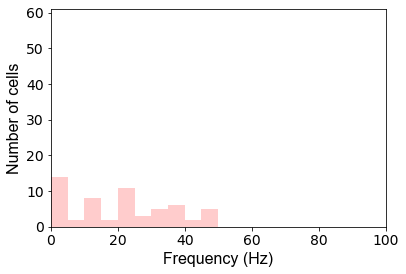

In [12]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,100)},
                         folder=folder, save=True)

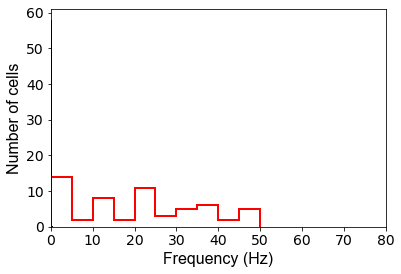

In [13]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency_step(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,80)},
                         folder=folder, save=True)

In [14]:
mean_frequency_dict = mean_frequency(dictionary=frequency_analysis_dict, parameters={"interval": [0,60]})

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


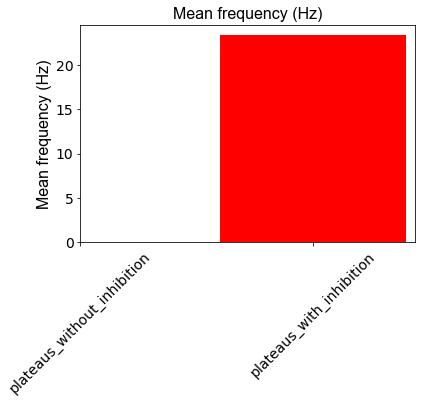

In [15]:
plot_mean_frequency(mean_frequency_dict = mean_frequency_dict, folder=folder,colors=colors, experiment_names=e)